In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
customer = pd.read_csv('Telco-Customer-Churn.csv')
customer.head()
customer.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#data cleaning
#forcing converts to numeric
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce')
#checking for null values
print(f"Nulls in TotalCharges: {customer['TotalCharges'].isnull().sum()}")
#filling nulls with 0 (since they are new customers) or completely drop them
customer['TotalCharges'].fillna(0, inplace=True)
#dropping 'customerID' as it has no predictive power
customer.drop('customerID', axis=1, inplace=True)
customer


Nulls in TotalCharges: 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


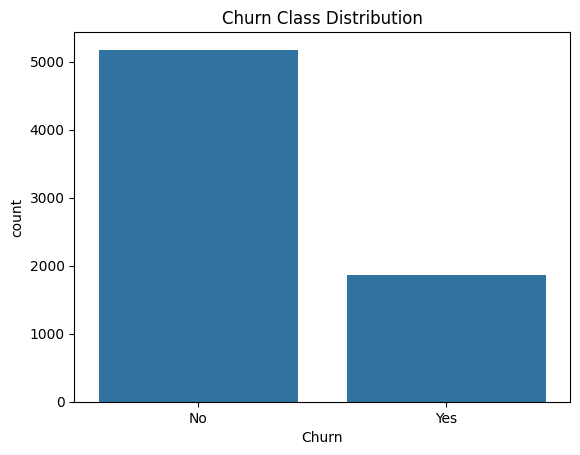

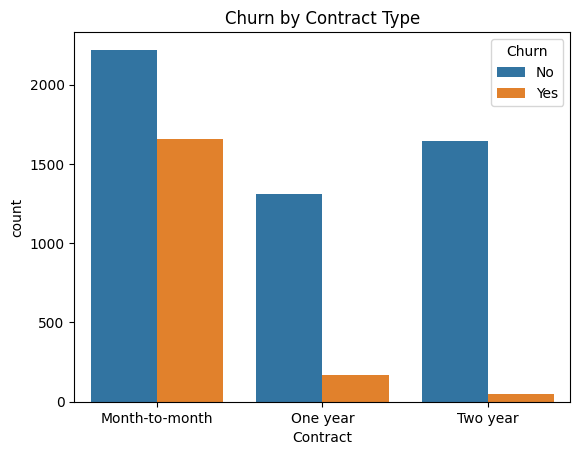

In [10]:
#eda
#visualising churn count
sns.countplot(x='Churn', data=customer)
plt.title("Churn Class Distribution")
plt.show()
#visualise churn by contract type
sns.countplot(x='Contract', hue='Churn', data=customer)
plt.title("Churn by Contract Type")
plt.show()

In [11]:
#preprocessing
#binary encoding for the target
customer['Churn'] = customer['Churn'].map({'Yes': 1, 'No': 0})
#one hot encoding for other categoricals
customer_encoded = pd.get_dummies(customer, drop_first=True) 

In [13]:
#model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#splitting data
x = customer_encoded.drop('Churn', axis=1)
y = customer_encoded['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#training the baseline model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

#prediction
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

#standard splitting
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

#checking counts before SMOTE
print(f"Before SMOTE: {Counter(y_train)}")

Before SMOTE: Counter({0: 4139, 1: 1495})


In [15]:
#initialising SMOTE
smote = SMOTE(random_state=42)

#fitting SMOTE on the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#checking counts after SMOTE
print(f"After SMOTE: {Counter(y_train_resampled)}")

After SMOTE: Counter({0: 4139, 1: 4139})


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#initializing model
rf_model = RandomForestClassifier(random_state=42)
#training on the balanced SMOTE data
rf_model.fit(x_train_resampled, y_train_resampled)
#prediction on the original (unlanaced) data
y_pred = rf_model.predict(x_test)
#results
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.56      0.58      0.57       374

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.77      0.77      1409

